### How To Break Into the Field

As part of this survey, everyone who participated was asked a useful question. This was, what would be the best way to break into the field?

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('C:/Users/Cristian/AppData/Local/Programs/Python/Data science learning/Udacity/survey_results_public.csv')
schema = pd.read_csv('C:/Users/Cristian/AppData/Local/Programs/Python/Data science learning/Udacity/survey_results_schema.csv')
schema.head()

1. In order to understand what people say about breaking into the field, we will look at the **CousinEducation** field. To get a better perspective on the data let's look at what people were asked.

The questions that produced the data for each columns are stored in **schema**. For fun, let's make a function that could retrieve any of them (this might come in handy later) and use it to get our question of interest.

In [114]:
def get_description(column_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == column_name]['Question'])[0]
    return desc

get_description(df.columns[0])

'Respondent ID number'

We could get all of the questions if we wanted, using that function, like shown below

In [115]:
descrips = set(get_description(col) for col in df.columns)

But getting to the point, this is our question of interest.

In [116]:
get_description('CousinEducation')

"Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?\nLet's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?\nLet's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer. Which 

2. Now that we know what the question was let's see which option people think is the best to take to break into the field. The data is a bit strange because the respondents could pick multiple choices. I need to do a bit of research to find a function to help me split each choice into it's constituents and the count those but for the fun of it I wrote some code to do just that for me.

In [117]:
def coount_suggestions(df):
    cous_ed_vals_list = [[],[]]
    for i in range(df.shape[0]):
        if not pd.isnull(df['CousinEducation'].iloc[i]):
            for element in df['CousinEducation'].iloc[i].split('; '):
                if element not in cous_ed_vals_list[0]:
                    cous_ed_vals_list[0].append(element)
                    cous_ed_vals_list[1].append(1)
                else:
                    cous_ed_vals_list[1][cous_ed_vals_list[0].index(element)] += 1

    cous_ed_vals = pd.Series(cous_ed_vals_list[1],index=cous_ed_vals_list[0]).sort_values(ascending=False)

    study_df = pd.DataFrame(data = cous_ed_vals).reset_index()
    study_df.columns = ['method', 'suggesters/total reponders']
    study_df.set_index('method', inplace=True)
    props_study_df = study_df/df.shape[0]
    return props_study_df
    #return study_df

cous_ed_vals = coount_suggestions(df)
cous_ed_vals

,suggesters/total reponders
method,
Take online courses,0.232436
Buy books and work through the exercises,0.179144
Contribute to open source,0.121349
Part-time/evening courses,0.114177
Bootcamp,0.082138
Conferences/meet-ups,0.080515
Return to college,0.076903
Get a job as a QA tester,0.054235
Participate in online coding competitions,0.052298


Lots of numbers there. Let's plot them out.

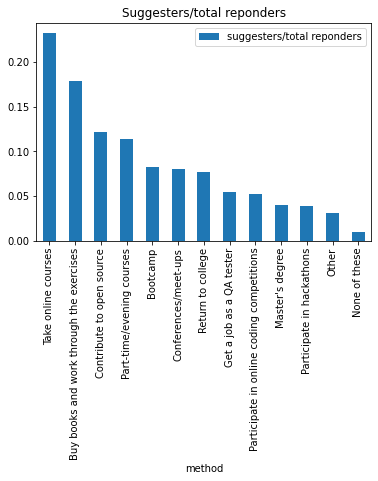

In [118]:
cous_ed_vals.plot(kind="bar");
plt.title("Suggesters/total reponders");

Seems like I am poking the bear in the right place by doing online courses.

3. I wonder if some of the individuals might have bias towards their own degrees. I'll map out in a separate column who has higher educations marking them with a 1 or 0 if they don't have a higher education.

In [119]:
def higher_ed(formal_ed_str):
    '''
    INPUT
        formal_ed_str - a string of one of the values from the Formal Education column
    
    OUTPUT
        return 1 if the string is  in ("Master's degree", "Professional degree")
        return 0 otherwise
    
    '''
    if formal_ed_str in ("Master's degree", "Professional degree"):
        return 1
    else:
        return 0
    

df["FormalEducation"].apply(higher_ed)[:5] #test

0    0
1    0
2    0
3    0
4    1
Name: FormalEducation, dtype: int64

In [120]:

df['HigherEd'] = df["FormalEducation"].apply(higher_ed)
higher_ed_perc = df['HigherEd'].mean()
higher_ed_perc

0.2302376714480159

Seems like quite a few people have higher educations.

#### Question 5

**5.** Now we would like to find out if the proportion of individuals who completed one of these three programs feel differently than those that did not. Store a dataframe of only the individual's who had **HigherEd** equal to 1 in **ed_1**.  Similarly, store a dataframe of only the **HigherEd** equal to 0 values in **ed_0**.

Notice, you have already created the **HigherEd** column using the check code portion above, so here you only need to subset the dataframe using this newly created column.

In [121]:
ed_1 = df[df['HigherEd'] == 1]
ed_0 = df[df['HigherEd'] == 0]


print(ed_1['HigherEd'][:5]) #test
print(ed_0['HigherEd'][:5]) #test

4     1
6     1
7     1
9     1
14    1
Name: HigherEd, dtype: int64
0    0
1    0
2    0
3    0
5    0
Name: HigherEd, dtype: int64


In [122]:
ed_1_perc = coount_suggestions(ed_1)
ed_0_perc = coount_suggestions(ed_0)

comp_df = pd.merge(ed_1_perc, ed_0_perc, left_index=True, right_index=True)
comp_df.columns = ['ed_1_perc', 'ed_0_perc']
comp_df['Diff_HigherEd_Vals'] = comp_df['ed_1_perc'] - comp_df['ed_0_perc']
comp_df.style.bar(subset=['Diff_HigherEd_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])

,ed_1_perc,ed_0_perc,Diff_HigherEd_Vals
method,,,
Take online courses,0.236926,0.231094,0.005832
Buy books and work through the exercises,0.188722,0.176279,0.012444
Contribute to open source,0.122328,0.121055,0.001273
Part-time/evening courses,0.117099,0.113303,0.003796
Bootcamp,0.084357,0.081474,0.002882
Return to college,0.079809,0.076034,0.003775
Conferences/meet-ups,0.077308,0.081474,-0.004167
Master's degree,0.064347,0.033256,0.031091
Get a job as a QA tester,0.058663,0.052911,0.005752


It seems that, if we filter the dataset for people with and without formal educations and then compare their responses, people with formal educations do recommend them more than without. Everything else stays mostly the same bar the suggestion to buy books and work through the exercises.

I am very glad to see that entry in the industry is not dependant on posessing a university degree as I find that the ratio of educataion you get / costs is not worth it there is another option available. In my current job I have learned EVERYTHING I know on the job.